<a href="https://colab.research.google.com/github/roscibely/animation/blob/main/Animation_inverted_pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Inverted pendulum animation

This animation illustrates the inverted pendulum problem.

In [1]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
from matplotlib.lines import Line2D

In [4]:
#System function without control
def f(y,t) :
    #parameters
    G = 9.81 
    L = 0.5  
    m = 0.15  
    b = 0.01   
    x1,x2 = y    
    u = 0 #no control
    dydt =[x2,  (m*G*L*sin(x1) + u - b*x2) / (m*L**2)]
    return dydt

#System function with control
def fu(y,t) :
    #parameters
    G = 9.81 
    L = 0.5  
    m = 0.15  
    b = 0.01   
    x1,x2 = y    
    Ku = np.matrix([[-14.6979, -4.7556]]) #control
    u = (Ku.item(0)*x1 + Ku.item(1)*x2)
    dydt =[x2,  (m*G*L*sin(x1) + u - b*x2) / (m*L**2)]
    return dydt

L = 0.5 
t = np.arange(0.0, 10, 0.05) # create a time array from 0..10 sampled at 0.05 second steps
th = 60                      # initial angles (degrees)
w = 0                        # initial angular velocities (degrees per second)
state = np.radians([th, w])  # initial state

# integrate your ODE using scipy.integrate.
y = integrate.odeint(f, state, t)
x1 = L*sin(y[:, 0])
y1 = -L*cos(y[:, 0])

y = integrate.odeint(fu, state, t)
xc = L*sin(y[:, 0])
yc = -L*cos(y[:, 0])

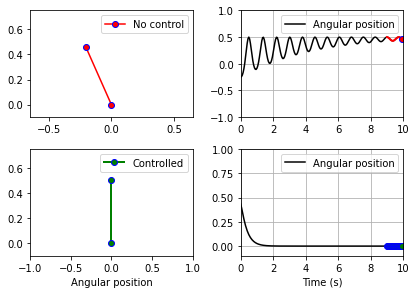

In [9]:
class SubplotAnimation(animation.TimedAnimation):
    def __init__(self):
        fig = plt.figure()
        ax1 = fig.add_subplot(2, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)
        ax3 = fig.add_subplot(2, 2, 3)
        ax4 = fig.add_subplot(2, 2, 4)
        fig.tight_layout() 
        self.t = np.arange(0.0, 10, 0.05)
        self.x=x1
        self.y=y1
        self.xc=xc
        self.yc=yc


        self.line1 = Line2D(
            [], [], color='red', marker='o', markeredgecolor='b')
        ax1.add_line(self.line1)
        ax1.set_xlim(-1, 1)
        ax1.set_ylim(-0.1, 0.75)
        ax1.legend(['No control'])
        ax1.set_aspect('equal', 'datalim')


        self.line2 = Line2D([], [], color='black')
        self.line2a = Line2D([], [], color='red', linewidth=2)
        self.line2e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='b')
        ax2.add_line(self.line2)
        ax2.add_line(self.line2a)
        ax2.add_line(self.line2e)
        ax2.set_xlim(0, 10)
        ax2.set_ylim(-1, 1)
        ax2.grid(True)
        ax2.legend(['Angular position'])


        ax3.set_xlabel('Angular position')
        self.line3 = Line2D(
            [], [], color='green', marker='o', markeredgecolor='b',  linewidth=2)
        ax3.add_line(self.line3)
        ax3.set_xlim(-1, 1)
        ax3.set_ylim(-0.1, 0.75)
        ax3.legend(['Controlled'])
        ax1.set_aspect('equal', 'datalim')

        self.line4 = Line2D([], [], color='black')
        self.line4e = Line2D([], [], color='red', linewidth=2)
        self.line4a = Line2D(
            [], [], color='green', marker='o', markeredgecolor='b')
        ax4.add_line(self.line4)
        ax4.add_line(self.line4a)
        ax4.add_line(self.line4e)
        ax4.set_xlim(0, 10)
        ax4.set_ylim(-0.1, 1)
        ax4.grid(True)
        ax4.set_xlabel('Time (s)')
        ax4.legend(['Angular position'])

        animation.TimedAnimation.__init__(self, fig, interval=50, blit=True)

    def _draw_frame(self, framedata):
        i = framedata
        head_slice = (self.t > self.t[i] - 1.0) & (self.t < self.t[i])

        self.line1.set_data([0, self.x[i]], [0, self.y[i]])

        self.line2.set_data(self.t, self.y)
        self.line2a.set_data(self.t[head_slice], self.y[head_slice])
        self.line2e.set_data(self.t[i - 1], self.y[i - 1])

        self.line3.set_data([0,-self.xc[i]], [0,-self.yc[i]])

        self.line4.set_data(self.t, self.xc)
        self.line4a.set_data(self.t[head_slice], self.xc[head_slice])
        self.line4e.set_data(self.t[i - 1], self.xc[i - 1])

        self._drawn_artists = [self.line1, 
                               self.line2, self.line2a, self.line2e,
                               self.line3,
                               self.line4, self.line4a, self.line4e]

    def new_frame_seq(self):
        return iter(range(self.t.size))

    def _init_draw(self):
        lines = [self.line1,
                 self.line2, self.line2a, self.line2e,
                 self.line3,
                 self.line4, self.line4a, self.line4e]
        for l in lines:
            l.set_data([], [])

ani = SubplotAnimation()
ani.save('video.mp4')
plt.show()